### Análisis de los 4 valores de B para el tiempo de estabilización

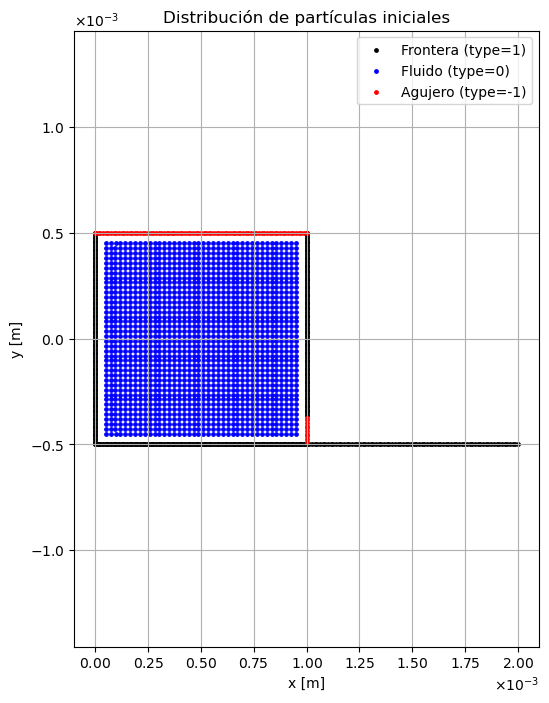

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib.ticker import ScalarFormatter

# --- Rutas ---
PROJECT_ROOT = Path().resolve().parent
SIMULATION_ROOT = PROJECT_ROOT / "Output" / "exp_B_4x7k" 
output_B048 = SIMULATION_ROOT / "experiment_B0.480000" / "Output" / "state_0000.txt"

# --- Cargar datos ---
df = pd.read_csv(output_B048, sep=" ")

# --- Separar por tipo ---
df_fluid = df[df["type"] == 0]
df_boundary = df[df["type"] == 1]
df_hole = df[df["type"] == -1]

# --- Graficar ---
plt.figure(figsize=(6, 8))
plt.scatter(df_boundary["posx"], df_boundary["posy"], s=6, c="black", label="Frontera (type=1)")
plt.scatter(df_fluid["posx"], df_fluid["posy"], s=6, c="blue", label="Fluido (type=0)")
plt.scatter(df_hole["posx"], df_hole["posy"], s=6, c="red", label="Agujero (type=-1)")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.title("Distribución de partículas iniciales")
plt.legend()
plt.axis("equal")
plt.grid(True)

# --- Notación científica en los ejes ---
ax = plt.gca()
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# Mostrar figura
plt.show()


Graficamos la densidad promedio de un archivo para ver como establecer el análisis por cambio de estabilización

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Ruta a la carpeta que contiene los archivos
PROJECT_ROOT = Path().resolve().parent
OutputSim = SIMULATION_ROOT / "experiment_B0.480000" / "Output"
archivos = sorted(glob.glob(os.path.join(OutputSim, "state_*.txt")))

In [10]:
promedios_rho = []
indices = []

for archivo in archivos:
    # Lee el archivo: separador = espacios, primera línea = encabezado
    df = pd.read_csv(archivo, sep=r"\s+", header=0)
    
    # Calcula el promedio de la columna rho
    promedio = df["rho"].mean()
    promedios_rho.append(promedio)
    
    # Extrae el índice (número del archivo)
    indice = int(os.path.basename(archivo).split("_")[1].split(".")[0])
    indices.append(indice)

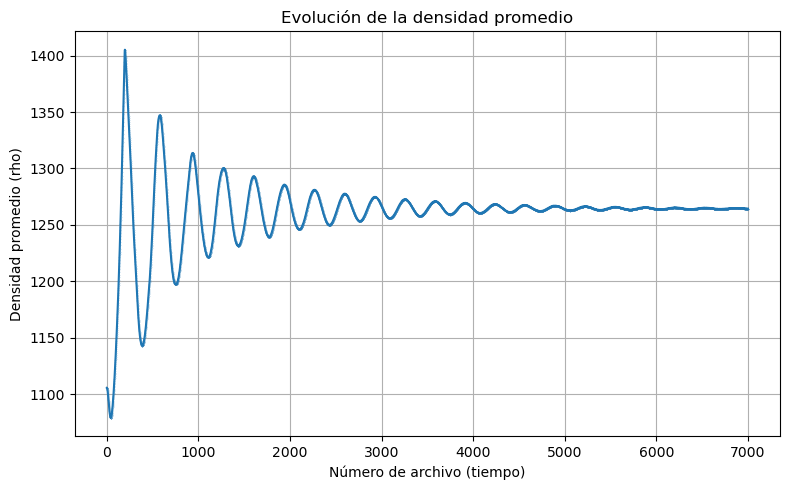

In [14]:
# Graficar la densidad promedio
plt.figure(figsize=(8,5))
plt.plot(indices, promedios_rho, marker='o', markersize=0.1)
plt.xlabel("Número de archivo (tiempo)")
plt.ylabel("Densidad promedio (rho)")
plt.title("Evolución de la densidad promedio")
plt.grid(True)
plt.tight_layout()
plt.show()

(4000.0, 4500.0)

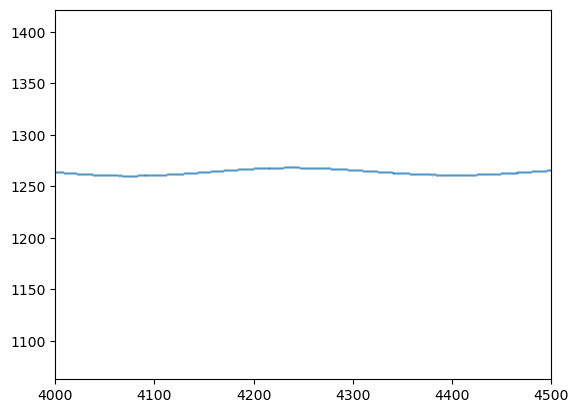

In [33]:
plt.scatter(indices, promedios_rho, s=0.1)
plt.xlim(4000,4500)

In [40]:
import numpy as np

# y es tu señal, por ejemplo y = np.array(promedios_rho)
y = np.array(promedios_rho)
t = np.array(indices)
picos = []

for i in range(1, len(y)-1):
    # máximo local
    if y[i] > y[i-1] and y[i] > y[i+1]:
        picos.append(i)
    # mínimo local
    elif y[i] < y[i-1] and y[i] < y[i+1]:
        picos.append(i)

picos = np.array(picos)

print("Picos detectados:", len(picos))

Picos detectados: 1185


(0.0, 2500.0)

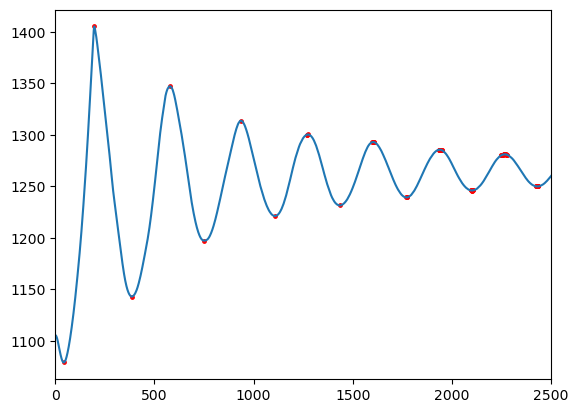

In [41]:
import matplotlib.pyplot as plt

plt.plot(y)
plt.scatter(picos, y[picos], color='red', s=6)
plt.xlim(0,2500)


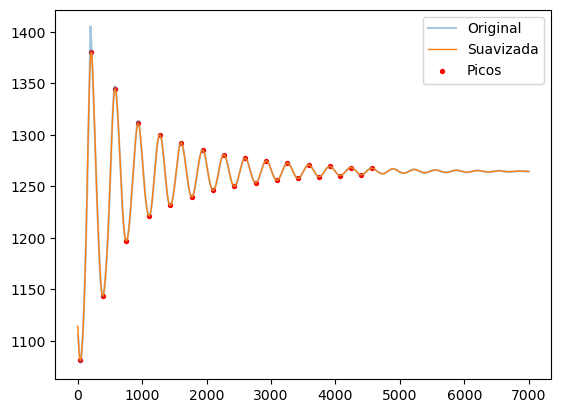

Picos detectados: 28


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, savgol_filter

# y = densidad
# t = tiempo

# 1) Suavizar fuertemente para eliminar ruido
y_smooth = savgol_filter(y, window_length=151, polyorder=3)

# 2) Detectar máximos y mínimos usando prominence
pmax, _ = find_peaks(y_smooth, prominence=5)
pmin, _ = find_peaks(-y_smooth, prominence=5)

# 3) Combinar y limpiar picos muy cercanos
picos = np.sort(np.concatenate([pmax, pmin]))

picos_filtrados = [picos[0]]
for i in range(1, len(picos)):
    if picos[i] - picos_filtrados[-1] > 50:
        picos_filtrados.append(picos[i])

picos_filtrados = np.array(picos_filtrados)

# 4) Graficar
plt.plot(t, y, label="Original", alpha=0.4)
plt.plot(t, y_smooth, label="Suavizada", linewidth=1)
plt.scatter(t[picos_filtrados], y_smooth[picos_filtrados], s=8, c="red", label="Picos")
plt.legend()
plt.show()

print("Picos detectados:", len(picos_filtrados))

In [47]:
type(picos_filtrados)

numpy.ndarray

In [53]:
picos_filtrados[i]

np.int64(4560)

In [58]:
duplas = [[picos_filtrados[i], picos_filtrados[i+1]] for i in range(0, len(picos)-1, 2)]
promedio_duplas = [float(np.mean([y_smooth[j], y_smooth[k]])) for (j,k) in duplas]

print(duplas)
print(promedio_duplas)

[[np.int64(40), np.int64(210)], [np.int64(388), np.int64(579)], [np.int64(754), np.int64(938)], [np.int64(1107), np.int64(1273)], [np.int64(1435), np.int64(1604)], [np.int64(1770), np.int64(1937)], [np.int64(2101), np.int64(2266)], [np.int64(2430), np.int64(2597)], [np.int64(2762), np.int64(2926)], [np.int64(3090), np.int64(3255)], [np.int64(3420), np.int64(3585)], [np.int64(3747), np.int64(3911)], [np.int64(4075), np.int64(4238)], [np.int64(4402), np.int64(4560)]]
[1230.585255852066, 1244.0503268195325, 1254.0719398719502, 1260.7404897038264, 1261.9645253711356, 1262.4039129700252, 1263.4823237406601, 1263.733567695304, 1264.063958015347, 1264.2678474025665, 1264.3225139330325, 1264.3394139448246, 1264.4033775306425, 1264.4319782221992]


In [59]:
variacion_pct = [
    100 * (promedio_duplas[i+1] - promedio_duplas[i]) / promedio_duplas[i]
    for i in range(len(promedio_duplas) - 1)
]

print("Variación porcentual entre promedios consecutivos:")
print(variacion_pct)

Variación porcentual entre promedios consecutivos:
[1.0942005767932945, 0.8055633149535345, 0.5317517775381404, 0.09708862984139836, 0.0348177456700244, 0.08542517648711946, 0.019885039143241617, 0.02614398544826335, 0.016129673338653776, 0.0043239674708391625, 0.0013366851895691666, 0.005059051795142795, 0.002261991075390239]


Una mejor forma de caracterizar es no usar la variación entre los promedios sino hallar el porcentaje que hay entre la amplitud de la onda y su correspondiente promedio

In [72]:
amplitud = [float(np.abs(y_smooth[j] - y_smooth[k])) for (j,k) in duplas]
print(amplitud)

[298.69578488368484, 200.55199168921786, 114.09703771330805, 78.69045884410593, 60.800862442371226, 45.59199391579659, 34.71809871979849, 27.306810939075376, 21.164845968157806, 16.586892184810722, 13.036204373808232, 10.055608586105564, 7.75927260269259, 6.3000282941068235]


In [73]:
variacion_amp_pct = [
    100 * (amplitud[i]/promedio_duplas[i])
    for i in range(len(promedio_duplas))
]

print(variacion_amp_pct)

[24.272660789915427, 16.120890559302172, 9.098125401399077, 6.241606380278301, 4.81795337507527, 3.611521910490081, 2.7478104020491747, 2.1608044319717923, 1.6743492949033867, 1.311976114783622, 1.0310821985804424, 0.795325090335623, 0.613670664012802, 0.4982496806957311]


Si queremos que la densidad varíe respecto al promedio central de una onda menos de un 1% entonces vamos hasta el índice que tiene una variación menor a 1

In [74]:
amp_1 = variacion_amp_pct.index(0.795325090335623)
print(amp_1)

11


En este caso la variación irá hasta el índice 11 cuyo promedio central y dupla son respectivamente:

In [77]:
print(f"El valor promedio de la onda con variación menor al 1% es {promedio_duplas[11]:.3f}")
print(f"Su dupla asociada es {duplas[11]}")

El valor promedio de la onda con variación menor al 1% es 1264.339
Su dupla asociada es [np.int64(3747), np.int64(3911)]


### Como resultado tenemos que una variación menor a 1% en densidada para B = 0.48 se produce cerca de los 4000 pasos 